# Lead Case Study

## Online Courses

#### by Rahul Yadav & Akshay Nasarpuri

In [1]:
# Import all required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Set other Options
pd.set_option('max_columns', None)
sns.set_style('darkgrid')
%matplotlib inline

## Step 1: Reading and understanding the data

In [2]:
# load the data
leads_data = pd.read_csv('leads.csv')

In [3]:
# check head
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
# check shape
leads_data.shape

(9240, 37)

In [5]:
# check info
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [6]:
# create generic funcitons to extract categorical and numerical columns
def getCatCols(df):
    cols = df.select_dtypes('object').columns
    return cols

def getNumCols(df):
    cols = df.select_dtypes(['int64','float64']).columns
    return cols

In [7]:
# extract categorical and numerical columns in respective lists
cat_cols = getCatCols(leads_data)
num_cols = getNumCols(leads_data)
print('Categorical columns: ', len(cat_cols))
print('Numerical columns: ', len(num_cols))

Categorical columns:  30
Numerical columns:  7


In [8]:
# check summary of numerical cols
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## Step 2: Data Visualization and cleaning

In [9]:
#Check for percentage for missing values
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [10]:
#Check for Duplicates
leads_data[leads_data.duplicated(keep=False)]

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity


In [11]:
# extract all columns that have 'select' as one of their levels
cat_cols_select = []
for col in cat_cols:
    if len(leads_data.loc[(leads_data[col] == 'select') | (leads_data[col] == 'Select')]) > 0:
        cat_cols_select.append(col)
        
print(cat_cols_select)                
print('\nNumber of Categorical columns with ' +  '\'Select' +'\'' + ' as one of the levels: ',len(cat_cols_select)) 

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']

Number of Categorical columns with 'Select' as one of the levels:  4


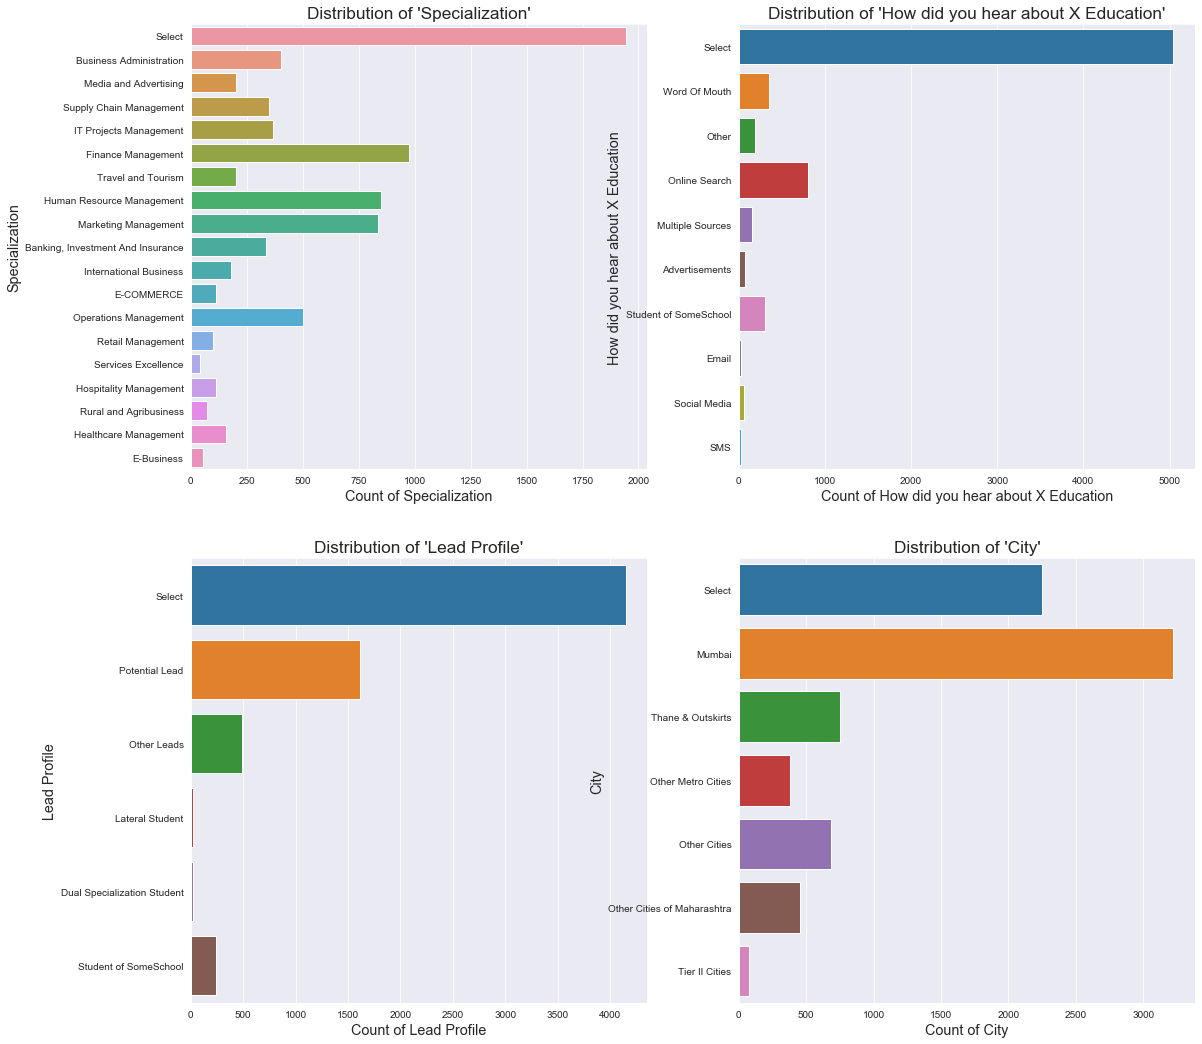

In [12]:
# plot countplot for the columns that have 'Select' as one of the levels
plt.figure(figsize=(18,18))
def countplot(col, subplot):
    plt.subplot(2,2,subplot)
    sns.countplot(y=leads_data[col])
    plt.title('Distribution of ' + '\'' + col + '\'', fontsize='xx-large')
    plt.ylabel(col, fontsize='x-large')
    plt.xlabel('Count of ' + col, fontsize='x-large')
    
for i in range(len(cat_cols_select)):
    countplot(cat_cols_select[i], i+1)
    
plt.show()      

In [13]:
# calculate %age contribution of 'Select' in the columns
print('%age contribution of ' + '\'' + 'Select' + '\'' + ' as a level in columns:')
print()
for col in cat_cols_select:
    select_percent = round(100*(len(leads_data.loc[leads_data[col] == 'Select']) / len(leads_data[col])),2)
    print('\'' + col + '\':' , select_percent)

%age contribution of 'Select' as a level in columns:

'Specialization': 21.02
'How did you hear about X Education': 54.58
'Lead Profile': 44.87
'City': 24.34


#### Reasons for the below imputations:
1. __Specialization__ column's 'Select' level can be inpreted as 
    - Either the user does not have any specialization
    - or their specialization is probably not mentioned in the list, and since there is no such field called as 'others', it's better to consider the values as missing values.
    

2. __How did you hear about X Education__ column's 'Select' level can be imputed as 'Other', since
    - There is a level called as 'Other' which exists,
    - Anyone who came to website would have some or the other reason, and since all the reasons cannot be mentioned in terms of levels, imputing them with 'Other' seems a viable choice
    
    
3. __City__ columns' 'Select' level can be considered as missing values, since
    - Even though there are levels, which states 'Other cities', these values cannot be considered as other cities, because we don't know whether they are
        - Other cities, or
        - Other metro cities, or
        - Other cities of Maharashtra
        
        
4. __Lead Profile__ columns' 'Select' level can be considered as missing values, since
    - it's an user input from X education's side and this user decides in which level a lead needs to be put in, and since the user has not put anything for them, the values can be considered as missing values. They can't be simply put into 'Other leads' category. 

In [14]:
# impute with either 'NaN' or some other meaningful name for the columns

leads_data['Specialization'] = leads_data['Specialization'].replace('Select', np.nan)
leads_data['How did you hear about X Education'] = leads_data['How did you hear about X Education'].replace('Select', 'Other')
leads_data['City'] = leads_data['City'].replace('Select', np.nan)
leads_data['Lead Profile'] = leads_data['Lead Profile'].replace('Select', np.nan)

In [15]:
# check the values again : calculate %age contribution of 'Select' in the columns
print('%age contribution of ' + '\'' + 'Select' + '\'' + ' as a level in columns:')
print()
for col in cat_cols_select:
    select_percent = round(100*(len(leads_data.loc[leads_data[col] == 'Select']) / len(leads_data[col])),2)
    print('\'' + col + '\':' , select_percent)

%age contribution of 'Select' as a level in columns:

'Specialization': 0.0
'How did you hear about X Education': 0.0
'Lead Profile': 0.0
'City': 0.0


In [16]:
#Check for percentage of null values in each column
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [17]:
#Extract all the columns that have more than 30% missing values
cols_to_drop = leads_data.columns[round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2) >=30]
print(cols_to_drop)

Index(['Specialization', 'Tags', 'Lead Quality', 'Lead Profile', 'City',
       'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')


In [18]:
# drop all the columns that have more than 30% missing values
leads_data.drop(cols_to_drop, axis=1, inplace=True)

In [19]:
#check for missing values after dropping columns having more than 30% NULL values
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

Following columns still have NULL values:

- Lead Source
- TotalVisits
- Page Views Per Visit
- Last Activity
- Country
- How did you hear about X Education
- What is your current occupation
- What matters most to you in choosing a course


In [20]:
#Checking Lead Source column
leads_data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
Pay per Click Ads       1
welearnblog_Home        1
NC_EDM                  1
blog                    1
WeLearn                 1
testone                 1
youtubechannel          1
Name: Lead Source, dtype: int64

In [21]:
#As we can see from above Google has appeared two times in our data. We can go ahead and correct it out.
#Also since Google covers most of the data, we can replace the NAN values with Google.

leads_data['Lead Source']=leads_data['Lead Source'].replace('google','Google')
leads_data['Lead Source']=leads_data['Lead Source'].replace(np.nan, 'Google')

In [22]:
#Checking Total visits Column
leads_data['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [23]:
#check Median of column
leads_data['TotalVisits'].median()

3.0

In [24]:
#Replacing NULL values by 3 in TotalVisits
leads_data['TotalVisits']=leads_data['TotalVisits'].replace(np.nan, leads_data['TotalVisits'].median())

In [25]:
#Checking TotalVisits now
leads_data['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1443
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
23.0        6
21.0        6
27.0        5
24.0        5
25.0        5
22.0        3
28.0        2
29.0        2
26.0        2
251.0       1
74.0        1
30.0        1
141.0       1
54.0        1
41.0        1
115.0       1
43.0        1
42.0        1
32.0        1
55.0        1
Name: TotalVisits, dtype: int64

In [26]:
#Checking Page views per visit column
leads_data['Page Views Per Visit'].value_counts()

0.00     2189
2.00     1795
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
         ... 
1.19        1
3.91        1
55.00       1
3.17        1
2.57        1
12.33       1
2.08        1
3.38        1
2.90        1
1.48        1
2.38        1
14.50       1
11.50       1
8.50        1
1.45        1
1.31        1
3.43        1
3.83        1
1.54        1
2.86        1
1.64        1
3.29        1
8.33        1
6.67        1
1.21        1
1.27        1
8.21        1
2.14        1
2.63        1
2.45        1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [27]:
#checking median
leads_data['Page Views Per Visit'].median()

2.0

In [28]:
#Replacing NULL values by 2 in Page views per visit column
leads_data['Page Views Per Visit']=leads_data['Page Views Per Visit'].replace(np.nan,leads_data['Page Views Per Visit'].median())

In [29]:
#checking Page views per visit column now
leads_data['Page Views Per Visit'].value_counts()

0.00     2189
2.00     1932
3.00     1196
4.00      896
1.00      651
5.00      517
1.50      306
6.00      244
2.50      241
7.00      133
3.50       94
8.00       86
1.33       66
1.67       60
2.33       59
2.67       54
9.00       45
4.50       43
1.75       28
3.33       27
10.00      25
1.25       23
5.50       21
2.25       19
11.00      18
3.67       16
6.50       13
1.80       13
2.75       12
1.40       11
         ... 
1.19        1
3.91        1
55.00       1
3.17        1
2.57        1
12.33       1
2.08        1
3.38        1
2.90        1
1.48        1
2.38        1
14.50       1
11.50       1
8.50        1
1.45        1
1.31        1
3.43        1
3.83        1
1.54        1
2.86        1
1.64        1
3.29        1
8.33        1
6.67        1
1.21        1
1.27        1
8.21        1
2.14        1
2.63        1
2.45        1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [30]:
#Checking Last activity Column
leads_data['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [31]:
#As we don't have much info what the person could have chosen we can add a category called Not Sure for all NULL values.
leads_data['Last Activity']=leads_data['Last Activity'].replace(np.nan,'Not Sure')

In [32]:
#Checking Country Column
leads_data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
South Africa               4
Kuwait                     4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
China                      2
Uganda                     2
Netherlands                2
Bangladesh                 2
Asia/Pacific Region        2
Belgium                    2
Italy                      2
Ghana                      2
Liberia                    1
Kenya                      1
Tanzania                   1
Russia                     1
Denmark                    1
Indonesia                  1
Switzerland   

In [33]:
# generic funtion to visualize the imbalance for a particular feature 
def checkImbalance(col):
    plt.figure(figsize=(9,7))
    sns.countplot(leads_data[col])
    plt.title('Distribution of ' + '\'' + col + '\'', fontsize='xx-large')
    plt.xlabel(col, fontsize='x-large')
    plt.ylabel('Count of ' + col, fontsize='x-large')
    plt.xticks(rotation=90)
    plt.show() 

70.26


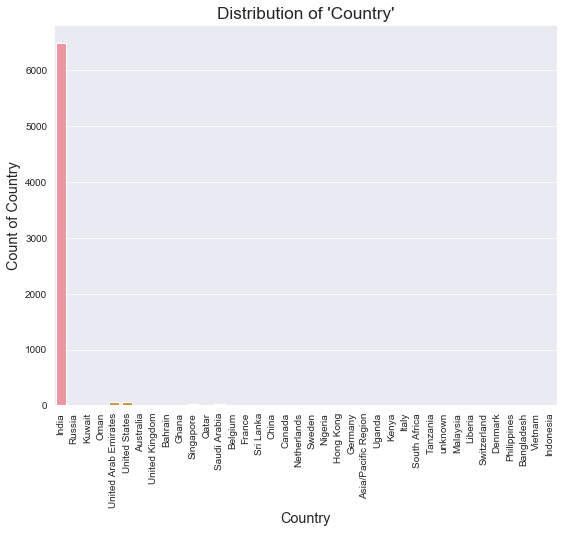

In [34]:
#From the above we can see India occupies most of the responses. Let's check its percentage in the column.
Country_percent=round(100*len(leads_data[leads_data['Country']=='India'])/len(leads_data['Country']), 2)
print(Country_percent)

# plot graph
checkImbalance('Country')

In [35]:
#As we can see from above India occurs 70% of time, the imbalance is also huge leading to less variance in the column
# and there are 27% missing values in column Country. The column is not relevant for model building
#We can drop the column Country

leads_data=leads_data.drop(['Country'], axis=1)

In [36]:
#Checking what is your occupation column
leads_data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [37]:
#Since no don't have much info, we can add a new category called No Info for all NULL Values
leads_data['What is your current occupation']=leads_data['What is your current occupation'].replace(np.nan, 'No Info')

In [38]:
leads_data['What is your current occupation'].value_counts()

Unemployed              5600
No Info                 2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [39]:
#Checking What matters most to you in choosing a course Column
leads_data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

70.65


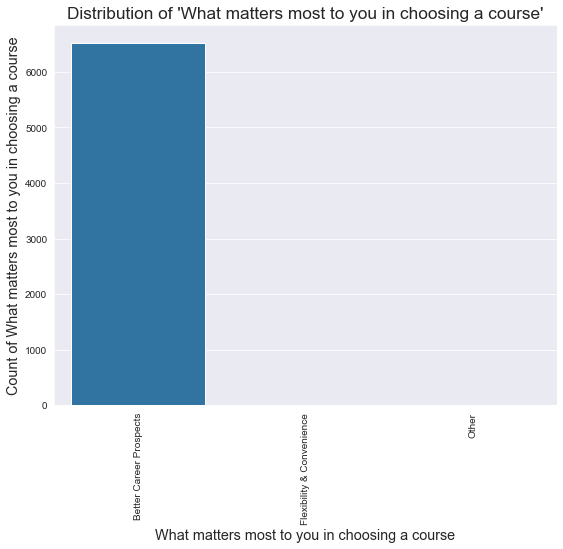

In [40]:
#'As Better Career Prospects' comes up more, let's check out its percentage in the column
Percent=round(100*len(leads_data[leads_data['What matters most to you in choosing a course']=='Better Career Prospects'])/
                     len(leads_data['What matters most to you in choosing a course']), 2)

print(Percent)

# plot graph
checkImbalance('What matters most to you in choosing a course')

In [41]:
#As we can see 'Better Career Prospects' occurs 70% of the time, the imbalance is also huge leading to less variance in the 
#column and there are 29% missing values in the Column
#We can drop the column What matters most to you in choosing a course
leads_data=leads_data.drop(['What matters most to you in choosing a course'], axis=1)

56.59


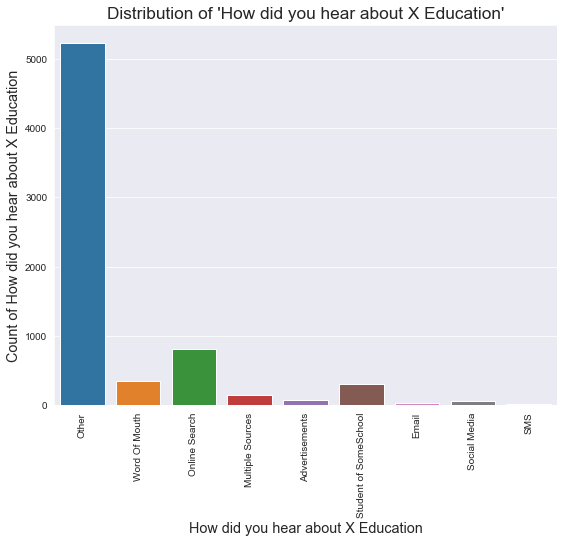

In [42]:
#'As Better Career Prospects' comes up more, let's check out its percentage in the column
Percent=round(100*len(leads_data[leads_data['How did you hear about X Education']=='Other'])/
                     len(leads_data['How did you hear about X Education']), 2)

print(Percent)

# plot graph
checkImbalance('How did you hear about X Education')

In [43]:
#As we can see 'Other' occurs 57% of the time, the imbalance is also huge leading to less variance in the 
#column and there are 24% missing values in the Column
#We can drop the column What matters most to you in choosing a course
leads_data=leads_data.drop(['How did you hear about X Education'], axis=1)

In [44]:
#Check for percentages of NULL values in each column now
percent_missing = round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)
print(percent_missing)

Prospect ID                                 0.0
Lead Number                                 0.0
Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content       

In [45]:
# create a generic describe function to check the summary of columns
def describe_cols(cols):
    return leads_data.loc[:,cols].describe()

In [46]:
# extract categorical and numerical columns in respective lists
cat_cols = getCatCols(leads_data)
num_cols = getNumCols(leads_data)
print('Categorical columns: ', len(cat_cols))
print('Numerical columns: ', len(num_cols))

Categorical columns:  20
Numerical columns:  5


In [47]:
# describe the categorical columns to check the unique values in them
describe_cols(cat_cols)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,What is your current occupation,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240,9240
unique,9240,5,20,2,2,18,7,2,1,2,2,2,2,2,1,1,1,1,2,16
top,7cfb3e6d-e7e7-4f54-8909-22262d05849e,Landing Page Submission,Google,No,No,Email Opened,Unemployed,No,No,No,No,No,No,No,No,No,No,No,No,Modified
freq,1,4886,2909,8506,9238,3437,5600,9226,9240,9238,9239,9239,9236,9233,9240,9240,9240,9240,6352,3407


#### It can be seen that there are 5 variables with just 1 value, These are:
1. Magazine
2. Receive More Updates About Our Courses
3. Update me on Supply Chain Content
4. Get updates on DM Content
5. I agree to pay the amount through cheque

In [48]:
#Following columns have only single value i.e. "No" in all rows, so we can drop these columns
leads_data=leads_data.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content', 
                          'Get updates on DM Content','I agree to pay the amount through cheque'], axis=1)

In [49]:
# check shape again
leads_data.shape

(9240, 20)

### Outlier Check 

In [50]:
#Checking Outliers at 25%, 50%, 75%, 90%, 95% and above
leads_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
90%,650506.100000,1.000000,7.000000,1380.000000,5.000000
95%,655404.050000,1.000000,10.000000,1562.000000,6.000000
99%,659592.980000,1.000000,17.000000,1840.610000,9.000000


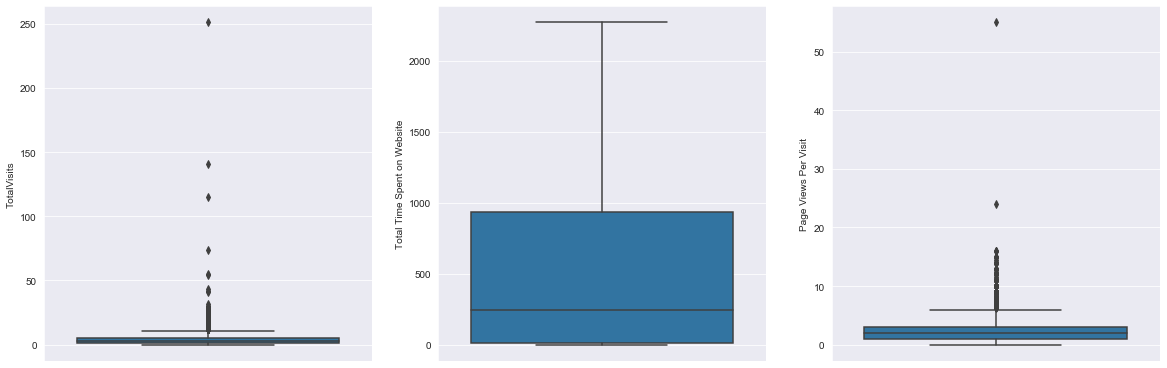

In [51]:
# Check the outliers in all the numeric columns

plt.figure(figsize=(20, 30))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', data = leads_data)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website', data = leads_data)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit',data = leads_data)
plt.show()

In [52]:
#Removing Values beyond 99% in TotalVisits column
quantile_total_visits = leads_data['TotalVisits'].quantile(0.99)
leads_data = leads_data[leads_data["TotalVisits"] < quantile_total_visits]
leads_data["TotalVisits"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        3.179740
std         2.913631
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%         9.000000
99%        13.000000
max        16.000000
Name: TotalVisits, dtype: float64

In [53]:
#Removing values beyong 99% in Page views per visit column
quantile_page_visit = leads_data['Page Views Per Visit'].quantile(0.99)
leads_data = leads_data[leads_data["Page Views Per Visit"] < quantile_total_visits]
leads_data["Page Views Per Visit"].describe(percentiles=[.25,.5,.75,.90,.95,.99])

count    9141.000000
mean        2.329506
std         2.046673
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

In [54]:
#Checking Outliers at 25%, 50%, 75%, 90%, 95% and above
leads_data.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9141.00000,9141.000000,9141.000000,9141.000000,9141.000000
mean,617233.45192,0.385406,3.179740,486.074609,2.329506
std,23413.72193,0.486718,2.913631,547.856302,2.046673
min,579533.00000,0.000000,0.000000,0.000000,0.000000
25%,596519.00000,0.000000,1.000000,10.000000,1.000000
50%,615563.00000,0.000000,3.000000,247.000000,2.000000
75%,637414.00000,1.000000,5.000000,933.000000,3.000000
90%,650514.00000,1.000000,7.000000,1379.000000,5.000000
95%,655406.00000,1.000000,9.000000,1561.000000,6.000000
99%,659592.80000,1.000000,13.000000,1839.600000,9.000000


#### Outliers have been taken care of.

In [55]:
# check shape again
leads_data.shape

(9141, 20)

In [56]:
# Determine the percentage of data retained

data_retained = round(100*(len(leads_data)/9240),2)
print(data_retained)

98.93


### around 99% of the data is retained after cleaning the data

## Step 3: Data Preparation

### Dealing with Categorical and Numerical Variables
1. Encoding
    - change binary cat vars to 1/0
    - change other cat vars to dummies
    
    
2. Splitting data frame into train and test


3. Rescaling of numerical variables


In [57]:
# get categorical and numerical cols for data preparation
cat_cols = getCatCols(leads_data)
num_cols = getNumCols(leads_data)
print('Categorical columns: ', len(cat_cols))
print('\nList of Categorical columns:', cat_cols)
print('\nNumerical columns: ', len(num_cols))
print('\nList of Numerical columns:', num_cols)

Categorical columns:  15

List of Categorical columns: Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'Last Activity', 'What is your current occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Numerical columns:  5

List of Numerical columns: Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit'],
      dtype='object')


In [58]:
# check head for all cat cols
leads_data.loc[:,cat_cols].head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,Page Visited on Website,Unemployed,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,Email Opened,Unemployed,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,Email Opened,Student,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,Unreachable,Unemployed,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,Converted to Lead,Unemployed,No,No,No,No,No,No,No,Modified


### 3.1. Encoding

#### 3.1.1 Binary Encoding

In [59]:
# check for potential binary columns with 2 levels
# describe the categorical columns to check the unique values in them
describe_cols(cat_cols)

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
count,9141,9141,9141,9141,9141,9141,9141,9141,9141,9141,9141,9141,9141,9141,9141
unique,9141,5,20,2,2,18,7,2,2,1,2,2,2,2,16
top,7cfb3e6d-e7e7-4f54-8909-22262d05849e,Landing Page Submission,Google,No,No,Email Opened,Unemployed,No,No,No,No,No,No,No,Modified
freq,1,4808,2890,8426,9139,3412,5533,9128,9140,9141,9140,9138,9135,6314,3384


#### It can be seen that there are 8 variables with binary values, i.e, 2 values. These are:
1. Do Not Email
2. Do Not Call
3. Search
4. Newspaper Article
5. Newspaper
6. Digital Advertisement
7. Through Recommendations
8. A free copy of Mastering The Interview

In [60]:
# create generic function to encode binary features
def encode_binary(x):
    return x.map({'Yes': 1, 'No': 0})

In [61]:
# create list of all binary columns
binary_cols = leads_data[cat_cols].columns[leads_data[cat_cols].nunique() == 2]
print(binary_cols)

Index(['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview'],
      dtype='object')


In [62]:
# apply the binary encoding function to the binary features so-found
leads_data[binary_cols] = leads_data[binary_cols].apply(encode_binary)

In [63]:
# check head of catgorical columns
leads_data[cat_cols].head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,What is your current occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,Page Visited on Website,Unemployed,0,0,No,0,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,Email Opened,Unemployed,0,0,No,0,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,0,Email Opened,Student,0,0,No,0,0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,Unreachable,Unemployed,0,0,No,0,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,0,Converted to Lead,Unemployed,0,0,No,0,0,0,0,Modified


In [64]:
# check if all the binary columns have been assigned 0/1
for col in binary_cols:
    print('--------------',col,'-------------------------')
    print(leads_data[col].value_counts())
    print()

-------------- Do Not Email -------------------------
0    8426
1     715
Name: Do Not Email, dtype: int64

-------------- Do Not Call -------------------------
0    9139
1       2
Name: Do Not Call, dtype: int64

-------------- Search -------------------------
0    9128
1      13
Name: Search, dtype: int64

-------------- Newspaper Article -------------------------
0    9140
1       1
Name: Newspaper Article, dtype: int64

-------------- Newspaper -------------------------
0    9140
1       1
Name: Newspaper, dtype: int64

-------------- Digital Advertisement -------------------------
0    9138
1       3
Name: Digital Advertisement, dtype: int64

-------------- Through Recommendations -------------------------
0    9135
1       6
Name: Through Recommendations, dtype: int64

-------------- A free copy of Mastering The Interview -------------------------
0    6314
1    2827
Name: A free copy of Mastering The Interview, dtype: int64



#### 3.1.2 Dummy encoding

`Note: After binary encoding, some of the categorical columns would have converted to numerical columns. Let's get the list of categorical and numerical columns again` 

In [65]:
# get categorical and numerical cols for data preparation
cat_cols = getCatCols(leads_data)
num_cols = getNumCols(leads_data)
print('Categorical columns: ', len(cat_cols))
print('\nList of Categorical columns:', cat_cols)
print('\nNumerical columns: ', len(num_cols))
print('\nList of Numerical columns:', num_cols)

Categorical columns:  7

List of Categorical columns: Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation', 'X Education Forums',
       'Last Notable Activity'],
      dtype='object')

Numerical columns:  13

List of Numerical columns: Index(['Lead Number', 'Do Not Email', 'Do Not Call', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Search', 'Newspaper Article', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview'],
      dtype='object')


In [66]:
# check for potential columns with more than 2 levels
# describe the categorical columns to check the unique values in them
describe_cols(cat_cols)

,Prospect ID,Lead Origin,Lead Source,Last Activity,What is your current occupation,X Education Forums,Last Notable Activity
count,9141,9141,9141,9141,9141,9141,9141
unique,9141,5,20,18,7,1,16
top,7cfb3e6d-e7e7-4f54-8909-22262d05849e,Landing Page Submission,Google,Email Opened,Unemployed,No,Modified
freq,1,4808,2890,3412,5533,9141,3384


#### It can be seen that there are 5 variables with unique levels more than 2, . These are:
1. Lead Origin
2. Lead Source
3. Last Activity
4. What is your current occupation
5. Last Notable Activity

`NOTE: Notice that the feature 'X Education Forums' now has only 1 value. Earlier we had treated these kind of variables, which had only 1 value, i.e., 'No' and we droppped them. Now, after outlier treatement, this particular feature has dropped from 2 unique values to 1 unique value. Let's drop this variable before creating dummies for other variables.`

`Also notice that the variable 'Prospect ID' has 9141 unique values, and as the name suggests, it's an ID column with alpha-numeric values. Let's not consider this variable for dummy encoding`

In [67]:
# drop the variable 'X Education Forums', since it has only 1 value, i.e, 'No'
leads_data.drop('X Education Forums', axis=1, inplace=True)

In [68]:
# get categorical columns again and see the change
cat_cols = getCatCols(leads_data)
print('Categorical columns: ', len(cat_cols))
print('\nList of Categorical columns:', cat_cols)

Categorical columns:  6

List of Categorical columns: Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation', 'Last Notable Activity'],
      dtype='object')


In [69]:
# describe the categorical columns again after dropping the feature 'X Education Forums'
describe_cols(cat_cols)

,Prospect ID,Lead Origin,Lead Source,Last Activity,What is your current occupation,Last Notable Activity
count,9141,9141,9141,9141,9141,9141
unique,9141,5,20,18,7,16
top,7cfb3e6d-e7e7-4f54-8909-22262d05849e,Landing Page Submission,Google,Email Opened,Unemployed,Modified
freq,1,4808,2890,3412,5533,3384


In [70]:
# create list of all potential columns for dummies
dummy_cols = leads_data[cat_cols].columns[(leads_data[cat_cols].nunique() > 2) 
                                          & (leads_data[cat_cols].nunique() != leads_data.shape[0])]
print(dummy_cols)

Index(['Lead Origin', 'Lead Source', 'Last Activity',
       'What is your current occupation', 'Last Notable Activity'],
      dtype='object')


In [71]:
# check head of potential dummy columns
leads_data[dummy_cols].head()

,Lead Origin,Lead Source,Last Activity,What is your current occupation,Last Notable Activity
0,API,Olark Chat,Page Visited on Website,Unemployed,Modified
1,API,Organic Search,Email Opened,Unemployed,Email Opened
2,Landing Page Submission,Direct Traffic,Email Opened,Student,Email Opened
3,Landing Page Submission,Direct Traffic,Unreachable,Unemployed,Modified
4,Landing Page Submission,Google,Converted to Lead,Unemployed,Modified


In [72]:
# print levels of all the potential columns for dummies
for col in dummy_cols:
    print('-------------------------' + col + '--------------------------')
    print(leads_data[col].value_counts())
    print()

-------------------------Lead Origin--------------------------
Landing Page Submission    4808
API                        3560
Lead Add Form               717
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

-------------------------Lead Source--------------------------
Google               2890
Direct Traffic       2505
Olark Chat           1751
Organic Search       1120
Reference             533
Welingak Website      142
Referral Sites        122
Facebook               55
bing                    6
Click2call              4
Live Chat               2
Press_Release           2
Social Media            2
Pay per Click Ads       1
youtubechannel          1
welearnblog_Home        1
NC_EDM                  1
blog                    1
WeLearn                 1
testone                 1
Name: Lead Source, dtype: int64

-------------------------Last Activity--------------------------
Email Opened                    3412
SMS Sent                  

In [73]:
# create dummmies
dummies = pd.get_dummies(leads_data[dummy_cols], drop_first=True)

# adding the results into the main data frame
leads_data = pd.concat([leads_data,dummies], axis=1)

# drop the original variables
leads_data.drop(columns=dummy_cols, axis=1, inplace=True)

In [74]:
# check head
leads_data.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Not Sure,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_No Info,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [75]:
# check shape again
leads_data.shape

(9141, 75)

### There are now 75 columns in the data frame

### 3.2 Split into train and test set

In [76]:
# removing variables 'Lead Number', 'Prospect ID', and 'Converted' and putting the rest into X, 
# since these variables will not be used for modelling
# 'Lead Number' & 'Prospect ID' variables will be used to identify the leads.
# and the variable 'Converted' is the target variable

# first lets check the unique values for both the columns
leads_data[['Prospect ID','Lead Number', 'Converted']].nunique()

Prospect ID    9141
Lead Number    9141
Converted         2
dtype: int64

In [77]:
# split into train and test
leads_data_train , leads_data_test = train_test_split(leads_data,train_size=0.7, test_size=0.3, random_state=100)

In [78]:
# check shapes
print('leads_data_train: ', leads_data_train.shape)
print('leads_data_test: ', leads_data_test.shape)

leads_data_train:  (6398, 75)
leads_data_test:  (2743, 75)


In [79]:
# get num cols
num_cols_X_train = getNumCols(leads_data_train)
print('\nNumerical columns: ', len(num_cols_X_train))
print('\nList of Numerical columns:', num_cols_X_train)


Numerical columns:  13

List of Numerical columns: Index(['Lead Number', 'Do Not Email', 'Do Not Call', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Search', 'Newspaper Article', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview'],
      dtype='object')


In [80]:
# putting target variable of train set to 'y_train'
y_train = leads_data_train['Converted']

y_train.head()

565     1
943     1
3796    0
6000    0
6737    1
Name: Converted, dtype: int64

In [81]:
# Create X_train
X_train = leads_data_train.drop(['Prospect ID','Lead Number', 'Converted'], axis=1)

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Not Sure,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_No Info,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
565,0,0,9.0,888,9.00,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
943,0,0,4.0,1048,1.33,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3796,0,0,3.0,176,3.00,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6000,0,0,1.0,147,1.00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6737,0,0,0.0,0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


### 3.3 Rescale the numerical variables

In [82]:
# convert to list
num_cols_X_train= num_cols_X_train.tolist()

# print(num_cols_X_train)
cols_to_drop = ['Lead Number', 'Converted']

# pop the variables from the 'num_cols_X_train' list
for col in cols_to_drop:
    num_cols_X_train.pop(num_cols_X_train.index(col))

X_train[num_cols_X_train].head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
565,0,0,9.0,888,9.00,0,0,0,0,0,1
943,0,0,4.0,1048,1.33,0,0,0,0,0,0
3796,0,0,3.0,176,3.00,0,0,0,0,0,1
6000,0,0,1.0,147,1.00,0,0,0,0,0,0
6737,0,0,0.0,0,0.00,0,0,0,0,0,0


#### There are 11 numerical variables, but all of them need not be rescaled. The binary variables need not  be scaled, since the interpretability of them will be lost. The binary variables are:
1. Do Not Email
2. Do Not Call
3. Search
4. Newspaper Article
5. Newspaper
6. Digital Advertisement
7. Through Recommendations
8. A free copy of Mastering The Interview

#### Let's take out these variables from the num_cols_X_train list. There will be 3 variables left.

In [83]:
# binary columns created earlier
print(binary_cols)

# pop the binary variables from the 'num_cols_train' list
for col in binary_cols:
    num_cols_X_train.pop(num_cols_X_train.index(col))

Index(['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article',
       'Newspaper', 'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview'],
      dtype='object')


In [84]:
# check the numerical columns again
print(num_cols_X_train)

# check length
print(len(num_cols_X_train))

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
3


In [85]:
# instantiate the MinMaxScaler object
scaler_obj = MinMaxScaler()

# rescale the numerical variables
X_train[num_cols_X_train] = scaler_obj.fit_transform(X_train[num_cols_X_train])

# check head
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Not Sure,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_No Info,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
565,0,0,0.5625,0.390845,0.562500,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
943,0,0,0.2500,0.461268,0.083125,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3796,0,0,0.1875,0.077465,0.187500,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6000,0,0,0.0625,0.064701,0.062500,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6737,0,0,0.0000,0.000000,0.000000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [86]:
# describe the data frame
X_train.describe()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Not Sure,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_No Info,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
count,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.0,6398.000000,6398.000000,6398.000000,6398.000000,6398.0,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.0,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.00000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.0,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000,6398.000000
mean,0.078149,0.000313,0.200268,0.214333,0.146241,0.001876,0.000156,0.000156,0.000469,0.000781,0.309003,0.522820,0.079400,0.005939,0.0,0.270866,0.005939,0.315098,0.000313,0.0,0.193185,0.125352,0.000156,0.000313,0.059862,0.011566,0.000156,0.000156,0.015161,0.000781,0.000156,0.000156,0.0,0.000156,0.045170,0.033917,0.029072,0.000156,0.372148,0.000156,0.010941,0.002657,0.011566,0.106127,0.066271,0.000156,0.303220,0.009847,0.006721,0.000625,0.000156,0.001250,0.288997,0.001876,0.02282,0.603782,0.080181,0.006408,0.017818,0.000156,0.308534,0.0,0.000156,0.001094,0.365114,0.020631,0.032041,0.000156,0.239606,0.002970,0.005158,0.000156
std,0.268428,0.017679,0.184435,0.241971,0.129782,0.043271,0.012502,0.012502,0.021651,0.027946,0.462118,0.499518,0.270383,0.076844,0.0,0.444442,0.076844,0.464591,0.017679,0.0,0.394828,0.331143,0.012502,0.017679,0.237250,0.106930,0.012502,0.012502,0.122203,0.027946,0.012502,0.012502,0.0,0.012502,0.207694,0.181029,0.168020,0.012502,0.4834

In [87]:
### Checking the Conversion Rate
converted = (sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100
print(round(converted,2))

38.54


#### There is almost 39% conversion rate 

## Step 4: Modelling

### 4.1 Feature Selection

In [88]:
# select features using RFE

# Instantiate LogisticRegression object
lr = LogisticRegression()

# Run RFE with 15 variables
rfe = RFE(lr,15)

# fit the model
rfe.fit(X_train,y_train)

RFE(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                 fit_intercept=True, intercept_scaling=1,
                                 l1_ratio=None, max_iter=100,
                                 multi_class='warn', n_jobs=None, penalty='l2',
                                 random_state=None, solver='warn', tol=0.0001,
                                 verbose=0, warm_start=False),
    n_features_to_select=15, step=1, verbose=0)

In [89]:
# check the list of features with their rankings
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 17),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', False, 45),
 ('Newspaper Article', False, 18),
 ('Newspaper', False, 5),
 ('Digital Advertisement', False, 31),
 ('Through Recommendations', False, 23),
 ('A free copy of Mastering The Interview', False, 54),
 ('Lead Origin_Landing Page Submission', False, 22),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 40),
 ('Lead Origin_Quick Add Form', False, 56),
 ('Lead Source_Direct Traffic', False, 25),
 ('Lead Source_Facebook', False, 39),
 ('Lead Source_Google', False, 36),
 ('Lead Source_Live Chat', False, 42),
 ('Lead Source_NC_EDM', False, 57),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 26),
 ('Lead Source_Pay per Click Ads', False, 35),
 ('Lead Source_Press_Release', False, 43),
 ('Lead Source_Reference', False, 9),
 ('Lead Source_Referral Sites', Fa

In [90]:
# check the selected columns
col = X_train.columns[rfe.support_]
print(col)

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_Not Sure',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Unreachable',
       'Last Notable Activity_Unsubscribed'],
      dtype='object')


In [91]:
# remove the columns which are not selected
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'Search', 'Newspaper Article', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
 

In [92]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

# check head
X_train_rfe.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_Not Sure,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
565,0,0.5625,0.390845,0.562500,0,0,0,0,0,0,0,0,0,0,0
943,0,0.2500,0.461268,0.083125,0,0,0,0,0,0,0,0,1,0,0
3796,0,0.1875,0.077465,0.187500,0,0,0,0,0,0,0,0,0,0,0
6000,0,0.0625,0.064701,0.062500,0,0,0,0,0,0,0,0,0,0,0
6737,0,0.0000,0.000000,0.000000,1,0,0,0,0,0,1,0,0,0,0


### 4.2 Build model based on selected features

In [93]:
# create generic function to build model
def build_model(y,X):
    # add constant to X_train
    X_sm = sm.add_constant(X)
    
    # create glm object
    lr_obj = sm.GLM(y, X_sm, families=sm.families.Binomial())
    
    # fit the model
    lr_model = lr_obj.fit()
    
    #check summary
    print(lr_model.summary())
    
    return X_sm

In [94]:
# create generic function to check VIF
def check_vif(X):
    vif = pd.DataFrame()
    vif['features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif

## Model 1

In [95]:
X_train_rfe = build_model(y_train, X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6398
Model:                            GLM   Df Residuals:                     6382
Model Family:                Gaussian   Df Model:                           15
Link Function:               identity   Scale:                         0.14105
Method:                          IRLS   Log-Likelihood:                -2804.8
Date:                Mon, 02 Mar 2020   Deviance:                       900.21
Time:                        08:51:14   Pearson chi2:                     900.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### p-values of all the features are less than the significance values, i.e. 0.05. Let's check for VIF.

In [96]:
X_train_rfe = X_train_rfe.drop('const', axis=1)
check_vif(X_train_rfe)

,features,VIF
3,Page Views Per Visit,5.15
1,TotalVisits,4.96
2,Total Time Spent on Website,2.02
4,Lead Origin_Lead Add Form,1.60
10,Last Activity_SMS Sent,1.53
5,Lead Source_Olark Chat,1.43
9,Last Activity_Olark Chat Conversation,1.40
6,Lead Source_Welingak Website,1.27
12,What is your current occupation_Working Profes...,1.19
8,Last Activity_Not Sure,1.17


#### VIF of 'Page Views Per Visit' is higher than the threshold value of 5. It shows multicollinearity. Let's drop it rebuild the model

In [97]:
X_train_rfe = X_train_rfe.drop('Page Views Per Visit', axis=1)

## Model 2

In [98]:
X_train_rfe = build_model(y_train,X_train_rfe)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6398
Model:                            GLM   Df Residuals:                     6383
Model Family:                Gaussian   Df Model:                           14
Link Function:               identity   Scale:                         0.14142
Method:                          IRLS   Log-Likelihood:                -2813.6
Date:                Mon, 02 Mar 2020   Deviance:                       902.69
Time:                        08:51:14   Pearson chi2:                     903.
No. Iterations:                     3                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

#### p-values of all the features now are less than the significance values, i.e. 0.05. Let's check for VIF.

In [99]:
X_train_rfe = X_train_rfe.drop('const', axis=1)
check_vif(X_train_rfe)

,features,VIF
2,Total Time Spent on Website,1.96
1,TotalVisits,1.91
3,Lead Origin_Lead Add Form,1.59
9,Last Activity_SMS Sent,1.48
4,Lead Source_Olark Chat,1.42
8,Last Activity_Olark Chat Conversation,1.40
5,Lead Source_Welingak Website,1.27
11,What is your current occupation_Working Profes...,1.19
7,Last Activity_Not Sure,1.17
0,Do Not Email,1.13


### VIF of all the features are below the threshold '5'. Let's predict the values on the train set

In [100]:
# add constant to X_train
X_train_sm = sm.add_constant(X_train)

# create glm obj
lr_obj = sm.GLM(y_train, X_train_sm, families=sm.families.Binomial())

# fit the model
lr_model = lr_obj.fit()

# Getting the predicted values on the train set
y_train_pred = lr_model.predict(X_train_sm)

# check 10 values of the prediction
y_train_pred.head(10)

565     0.473644
943     0.884820
3796    0.138046
6000    0.115327
6737    0.915725
8700    0.430219
6668    0.275948
8301   -0.001518
2463    0.323546
547     0.010789
dtype: float64

In [101]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([ 0.4736438 ,  0.88481952,  0.13804579,  0.11532656,  0.91572472,
        0.43021907,  0.2759479 , -0.00151819,  0.32354622,  0.01078912])

##### Creating a dataframe with the actual converted flag and the predicted probabilities

In [102]:
y_train_pred_final = pd.DataFrame({'Converted': y_train.values, 'Converted_Prob': y_train_pred})
y_train_pred_final['Leads'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Leads
0,1,0.473644,565
1,1,0.884820,943
2,0,0.138046,3796
3,0,0.115327,6000
4,1,0.915725,6737


### 4.3 Plot the ROC curve

In [103]:
# create function to draw roc curve
def draw_roc(actuals, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actuals , probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actuals, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' %auc_score)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]', fontsize='x-large')
    plt.ylabel('True Positive Rate', fontsize='x-large')
    plt.title('Receiver operating characteristic curve', fontsize='xx-large')
    plt.legend(loc='lower right')
    plt.show()

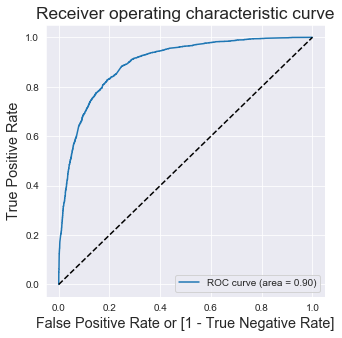

In [104]:
# draw roc curve
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### The accuracy of the model seems to be good. The are under the curve is 0.90

### 4.4 Find the optimal cut-off point

In [105]:
# create columns with different probability cutoffs
numbers = [float(i)/10 for i in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
    
# check head
y_train_pred_final.head()

,Converted,Converted_Prob,Leads,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.473644,565,1,1,1,1,1,0,0,0,0,0
1,1,0.884820,943,1,1,1,1,1,1,1,1,1,0
2,0,0.138046,3796,1,1,0,0,0,0,0,0,0,0
3,0,0.115327,6000,1,1,0,0,0,0,0,0,0,0
4,1,0.915725,6737,1,1,1,1,1,1,1,1,1,1


In [106]:
# calculate accuracy, sesitivity, and specificity for various probability cutoffs
cutoff_df = pd.DataFrame(columns = ('prob', 'accuracy', 'sensitivity', 'specificity'))

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final[i])
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    sensitivity = cm[1,1] / (cm[1,1] + cm[1,0])
    specificity = cm[0,0] / (cm[0,0] + cm[0,1])
    
    cutoff_df.loc[i] = [i, accuracy, sensitivity, specificity]
    
cutoff_df    

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.462957,0.997989,0.122955
0.1,0.1,0.578618,0.986726,0.319274
0.2,0.2,0.718193,0.953741,0.568507
0.3,0.3,0.788215,0.910700,0.710378
0.4,0.4,0.816974,0.812953,0.819530
0.5,0.5,0.820100,0.712389,0.888548
0.6,0.6,0.795874,0.567176,0.941207
0.7,0.7,0.763364,0.446903,0.964468
0.8,0.8,0.720225,0.307723,0.982362
0.9,0.9,0.686308,0.205551,0.991820


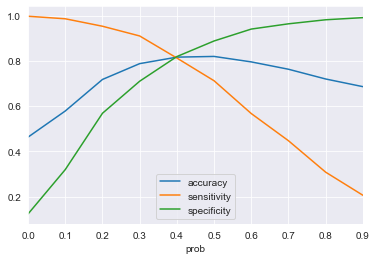

In [107]:
# plot accuracy, sensitivity, and specificity for various probabilities
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensitivity', 'specificity'])
plt.show()

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [108]:
# calculate the predicted converted values based on the cutoff chosen
y_train_pred_final['Converted_pred'] = y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.4 else 0)

# check head
y_train_pred_final.head()

,Converted,Converted_Prob,Leads,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Converted_pred
0,1,0.473644,565,1,1,1,1,1,0,0,0,0,0,1
1,1,0.884820,943,1,1,1,1,1,1,1,1,1,0,1
2,0,0.138046,3796,1,1,0,0,0,0,0,0,0,0,0
3,0,0.115327,6000,1,1,0,0,0,0,0,0,0,0,0
4,1,0.915725,6737,1,1,1,1,1,1,1,1,1,1,1


In [109]:
df_train = pd.concat([leads_data_train.reset_index().drop('index', axis=1), 
                               y_train_pred_final.reset_index().drop('index', axis=1)],axis=1)

df_train.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Not Sure,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_No Info,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Converted,Converted_Prob,Leads,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,Converted_pred
0,56003d67-9085-45fc-9e77-9906e6840e80,654434,0,0,1,9.0,888,9.00,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.473644,565,1,1,1,1,1,0,0,0,0,0,1
1,48af1f76-3059-4848-9dd2-d787a77285e9,650291,0,0,1,4.0,1048,1.33,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.884820,943,1,1,1,1,1,1,1,1,1,0,1
2,2ef7f562-dd74-4017-bddd-370c49fcaf3b,623715,0,0,0,3.0,176,3.00,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.138046,3796,1,1,0,0,0,0,0,0,0,0,0
3,c098270e-2df5-475b-b5ab-9c01971a8ed5,603777,0,0,0,1.0,147,1.00,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.115327,6000,1,1,0,0,0,0,0,0,0,0,0
4,acb7662d-d063-4104-a60e-c9eadb695535,598127,0,0,1,0.0,0,0.00,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0.915725,6737,1,1,1,1,1,1,1,1,1,1,1


In [110]:
# check the overll accuracy
print(round(100*(metrics.accuracy_score(y_train_pred_final['Converted'], y_train_pred_final['Converted_pred'])),2))

81.7


In [111]:
# check confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['Converted_pred'])
confusion

array([[3206,  706],
       [ 465, 2021]], dtype=int64)

In [112]:
# calculate the elements of the confusion matrix
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [113]:
# Check the sensitivity of the logistic regression model
print(round(100*TP / float(TP+FN),2))

81.3


In [114]:
# Check the specificity of the logistic regression model
print(round(100*TN / float(TN+FP),2))

81.95


In [115]:
# Calculate false postive rate - predicting Converted when leads did not get converted
print(round(100*(FP/ float(TN+FP)),2))

18.05


In [116]:
# Calculate Precision or Positive predictive value - Out of predicted as Converted, how many were correctly predicted 
print(round(100*(TP / float(TP+FP)),2))

74.11


### 4.5 Predictions on the test set

In [117]:
# putting target variable to 'y'
y_test = leads_data_test['Converted']

# check head of 'y'
y_test.head()

6542    0
964     1
1782    0
8583    1
9113    0
Name: Converted, dtype: int64

In [118]:
# Create X
X_test = leads_data_test.drop(['Prospect ID','Lead Number', 'Converted'], axis=1)

# check head of X
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Not Sure,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_No Info,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6542,0,0,5.0,160,5.0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
964,0,0,4.0,1541,4.0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1782,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8583,0,0,5.0,1538,2.5,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9113,0,0,8.0,42,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [119]:
num_cols_X_test = getNumCols(leads_data_test)
print('\nNumerical columns: ', len(num_cols_X_test))
print('\nList of Numerical columns:', num_cols_X_test)


Numerical columns:  13

List of Numerical columns: Index(['Lead Number', 'Do Not Email', 'Do Not Call', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Search', 'Newspaper Article', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview'],
      dtype='object')


In [120]:
# convert to list
num_cols_X_test= num_cols_X_test.tolist()

# print(num_cols_X_test)
cols_to_drop = ['Lead Number', 'Converted']

# pop the variables from the 'num_cols_X_test' list
for col in cols_to_drop:
    num_cols_X_test.pop(num_cols_X_test.index(col))

X_test[num_cols_X_test].head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
6542,0,0,5.0,160,5.0,0,0,0,0,0,1
964,0,0,4.0,1541,4.0,0,0,0,0,0,1
1782,0,0,0.0,0,0.0,0,0,0,0,0,0
8583,0,0,5.0,1538,2.5,0,0,0,0,0,0
9113,0,0,8.0,42,4.0,0,0,0,0,0,0


In [121]:
# Scale the features of test set

# rescale the numerical variables
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler_obj.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

# check head
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Not Sure,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_No Info,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
6542,0,0,0.3125,0.070423,0.31250,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
964,0,0,0.2500,0.678257,0.25000,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1782,0,0,0.0000,0.000000,0.00000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8583,0,0,0.3125,0.676937,0.15625,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9113,0,0,0.5000,0.018486,0.25000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [122]:
# making predictions on the test set

X_test_sm = sm.add_constant(X_test)

y_test_pred = lr_model.predict(X_test_sm)

y_test_pred[:10]

6542    0.424867
964     0.917502
1782    0.350740
8583    0.712761
9113    0.125736
7793    0.108604
4826    0.691908
4760    0.018854
7290    0.010922
6482    0.350740
dtype: float64

In [123]:
# reshape to use in the the data frame
y_test_pred = y_test_pred.values.reshape(-1)

In [124]:
# # calculate the probabilities
y_test_pred_final = pd.DataFrame({'Converted': y_test.values, 'Converted_Prob': y_test_pred})
y_test_pred_final['Leads'] = y_test.index
y_test_pred_final.head()

,Converted,Converted_Prob,Leads
0,0,0.424867,6542
1,1,0.917502,964
2,0,0.350740,1782
3,1,0.712761,8583
4,0,0.125736,9113


In [125]:
# calculate the predicted converted values based on the cutoff chosen
y_test_pred_final['Converted_pred'] = y_test_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.4 else 0)

# check head
y_test_pred_final.head()

,Converted,Converted_Prob,Leads,Converted_pred
0,0,0.424867,6542,1
1,1,0.917502,964,1
2,0,0.350740,1782,0
3,1,0.712761,8583,1
4,0,0.125736,9113,0


In [126]:
df_test = pd.concat([leads_data_test.reset_index().drop('index', axis=1), 
                               y_test_pred_final.reset_index().drop('index', axis=1)],axis=1)

df_test.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Not Sure,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_No Info,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Converted,Converted_Prob,Leads,Converted_pred
0,3db057d3-fbff-4fea-a895-ca062406aab6,599588,0,0,0,5.0,160,5.0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.424867,6542,1
1,31ae03c9-dbb6-4919-9938-8ab0b7f47ba9,649980,0,0,1,4.0,1541,4.0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.917502,964,1
2,612f48fb-8987-47e7-957a-2b824ed3ab3e,642089,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.350740,1782,0
3,49b36cd5-87a3-4d5d-b5bc-fbe8226d2d3a,584274,0,0,1,5.0,1538,2.5,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.712761,8583,1
4,d55c0186-8fbd-4238-862b-99eb1de0bd09,580502,0,0,0,8.0,42,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.125736,9113,0


In [127]:
# check the overll accuracy
print(round(100*(metrics.accuracy_score(y_test_pred_final['Converted'], y_test_pred_final['Converted_pred'])),2))

81.88


In [128]:
# check confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['Converted'], y_test_pred_final['Converted_pred'])
confusion

array([[1415,  291],
       [ 206,  831]], dtype=int64)

In [129]:
# calculate the elements of the confusion matrix
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [130]:
# Check the sensitivity of the logistic regression model
print(round(100*TP / float(TP+FN),2))

80.14


In [131]:
# Check the specificity of the logistic regression model
print(round(100*TN / float(TN+FP),2))

82.94


In [132]:
# Calculate false postive rate - predicting Converted when leads did not get converted
print(round(100*(FP/ float(TN+FP)),2))

17.06


In [133]:
# Calculate Precision or Positive predictive value - Out of predicted as Converted, how many were correctly predicted 
print(round(100*(TP / float(TP+FP)),2))

74.06


In [134]:
# create final data frame with Lead Score for train set
df_train['Lead Score'] = df_train['Converted_Prob'].map(lambda x: "%.2f" % round(x*100,2))

temp_list = X_train_rfe.columns.tolist()
relevant_cols = ['Prospect ID','Lead Number','Converted', 'Converted_Prob','Converted_pred','Lead Score']
for i in temp_list:
    relevant_cols.append(i)
    
df_train_final = df_train.loc[(df_train['Lead Score'] > '40'), relevant_cols]

df_train_final = df_train_final.sort_values(by='Lead Score', ascending=False)

df_train_final.head()    

,Prospect ID,Lead Number,Converted,Converted,Converted_Prob,Converted_pred,Lead Score,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_Not Sure,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
756,84198fb6-a579-4f25-80c9-3ad6cf3b13dc,634056,1,1,0.999723,1,99.97,0,0.0,0,1,0,0,0,0,0,0,0,1,0,0
3556,c54f2691-26f2-4f82-80cf-6b282088c1a4,643889,1,1,0.999723,1,99.97,0,0.0,0,1,0,0,0,0,0,0,0,1,0,0
5025,fbed4f56-3231-487b-a5cc-ffdb97cfa897,589006,1,1,0.999723,1,99.97,0,0.0,0,1,0,0,0,0,0,0,0,1,0,0
1709,0c33ac36-194b-428c-88c8-b20674a9c4c7,614090,0,0,0.999723,1,99.97,0,0.0,0,1,0,0,0,0,0,0,0,1,0,0
2068,47aef6b5-0a4f-4281-9b55-872067135b4f,627119,1,1,0.999723,1,99.97,0,0.0,0,1,0,0,0,0,0,0,0,1,0,0


In [135]:
# create final data frame with Lead Score for test set
df_test['Lead Score'] = df_test['Converted_Prob'].map(lambda x: "%.2f" % round(x*100,2))

relevant_cols = ['Prospect ID','Lead Number','Converted', 'Converted_Prob','Converted_pred','Lead Score']
for i in temp_list:
    relevant_cols.append(i)
    
df_test_final = df_test.loc[(df_test['Lead Score'] > '40'), relevant_cols]

df_test_final = df_test_final.sort_values(by='Lead Score', ascending=False)

df_test_final.head() 

,Prospect ID,Lead Number,Converted,Converted,Converted_Prob,Converted_pred,Lead Score,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_Not Sure,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Working Professional,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
1303,3110d646-c332-41e7-9f98-eb110f4b5773,624495,1,1,0.999723,1,99.97,0,0.0,0,1,0,0,0,0,0,0,0,1,0,0
1362,9f6adb7e-fb39-43d6-b4ce-322a68594c48,588011,1,1,0.999723,1,99.97,0,0.0,0,1,0,0,0,0,0,0,0,1,0,0
2236,a9b4f35e-6df5-4ed4-9753-f35753c08195,594063,1,1,0.999723,1,99.97,0,0.0,0,1,0,0,0,0,0,0,0,1,0,0
147,70c71ff4-5848-46da-b501-2e9867c46c06,658675,1,1,0.999723,1,99.97,0,0.0,0,1,0,0,0,0,0,0,0,1,0,0
1490,3e7b62f5-7c8b-4445-a384-a979cd6b9b6a,588873,1,1,0.999723,1,99.97,0,0.0,0,1,0,0,0,0,0,0,0,1,0,0


In [136]:
df_train_final.shape

(2734, 21)

In [137]:
df_test_final.shape

(1145, 21)

In [138]:
# % age of hot leads modelled
round(100*((df_train_final.shape[0] + df_test_final.shape[0]) / leads_data.shape[0]),2)

42.44

## Final model conclusion:
1. **Accuracy, Sensitivity and Specificity** values of test set are around 82%, 80% and 83% which are approximately closer to the respective values calculated using trained set.


2. The **lead score** calculated shows the conversion rate on the final predicted model is around 81% (in train set) and 80% in test set


3. Hence overall this model seems to be good